In [48]:
import numpy as np
import nbimporter
from compute_gradient_one_feat import compute_gradient_one_feature_vec
from cost_one_feature import compute_cost_one_feature_vec
from compute_one_feature_ import compute_prediction_one_feature_vec
import math

In [49]:
def compute_gradient_descent_one_feature(X,y,w_in,b_in,alpha,num_itrs,compute_cost,compute_gradient):
    m = X.shape[0]
    w = w_in
    b = b_in
    
    J_hist = []
    w_hist = []
    
    for i in range(num_itrs):
        dj_dw, dj_db = compute_gradient(X,y,w,b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        
        w_hist.append(w)
        J_hist.append(compute_cost(X,y,w,b))
        
        if i % (int(math.ceil(num_itrs/10) + 1)) == 0 :
            print(f" iteration {i}. cost {J_hist[-1]}, w = {w_hist[-1]}, b= {b}")
    
    return w,b,J_hist,w_hist

In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression




In [51]:
df = pd.read_csv("train.csv")
# missing =  df[df["y"].isna()]

df = df.dropna(subset=["y"])
# missing =  df[df["y"].isna()]
# df.describe()

In [52]:
X_train,y_train = df["x"].to_numpy(),df["y"].to_numpy()
y_train.shape


(699,)

In [53]:
w_fin, b_fin, J_hist, w_history = compute_gradient_descent_one_feature(X_train,y_train,0,0,1e-05,100000,compute_cost_one_feature_vec,compute_gradient_one_feature_vec)

 iteration 0. cost 1560.6448394876934, w = 0.03335424584518538, b= 0.0004993986917045781
 iteration 10001. cost 3.935657889097814, w = 0.9988705139503818, b= 0.011937375033644587
 iteration 20002. cost 3.9355707581224264, w = 0.9989147331520317, b= 0.008985838488136692
 iteration 30003. cost 3.935487888562483, w = 0.9989578574587076, b= 0.006107383825813149
 iteration 40004. cost 3.935409072000005, w = 0.9989999139806909, b= 0.0033002014937281118
 iteration 50005. cost 3.9353341102103565, w = 0.9990409291569956, b= 0.0005625267445941492
 iteration 60006. cost 3.9352628146637034, w = 0.9990809287719893, b= -0.0021073614726343152
 iteration 70007. cost 3.9351950060508547, w = 0.9991199379716033, b= -0.004711141594707035
 iteration 80008. cost 3.9351305138323047, w = 0.9991579812791374, b= -0.007250450499234505
 iteration 90009. cost 3.935069175809318, w = 0.9991950826106828, b= -0.009726884533717846


<Axes: >

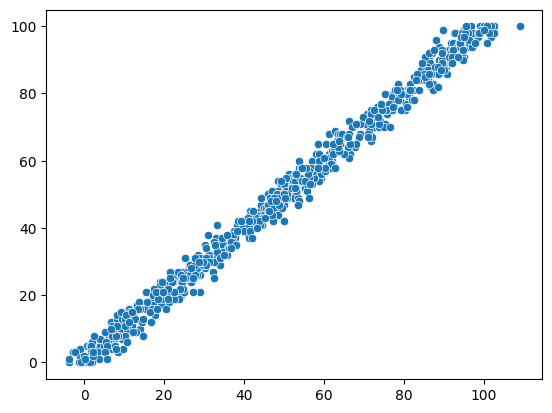

In [54]:
predictions= compute_prediction_one_feature_vec(X_train,w_fin,b_fin)
sns.scatterplot(x=y_train, y=predictions)

C:\Users\cIEESEY\AppData\Local\Temp\ipykernel_9408\4072520327.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


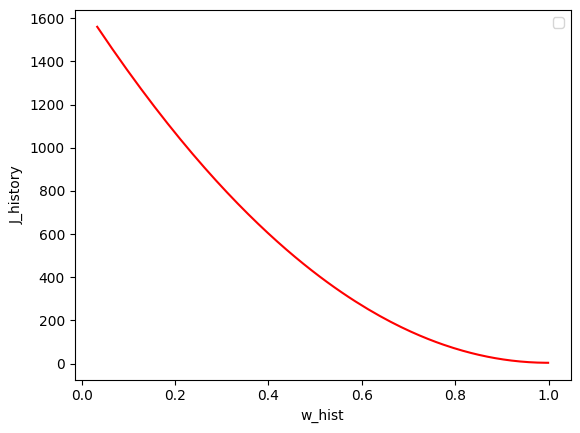

In [55]:
plt.plot(w_history[:9000],J_hist[:9000], color='red')
plt.xlabel("w_hist")
plt.ylabel("J_history")
plt.legend()
plt.show()

In [56]:
len(J_hist)
range(len(J_hist)-999,len(J_hist)+1)

range(99001, 100001)

In [57]:
print("Last 5 values:", J_hist[-5:])
print("Values around iter 400:", J_hist[395:405])
print("Min/Max in last 1000:", np.min(J_hist[-1000:]), np.max(J_hist[-1000:]))

Last 5 values: [np.float64(3.9350109230421504), np.float64(3.93501091735354), np.float64(3.9350109116649596), np.float64(3.9350109059764073), np.float64(3.935010900287882)]
Values around iter 400: [np.float64(3.9357457979879995), np.float64(3.935745788387341), np.float64(3.9357457788016643), np.float64(3.935745769229992), np.float64(3.9357457596714056), np.float64(3.9357457501250472), np.float64(3.9357457405901197), np.float64(3.935745731065873), np.float64(3.9357457215516125), np.float64(3.935745712046681)]
Min/Max in last 1000: 3.935010900287882 3.9350165973651086


3.9357488832646843


C:\Users\cIEESEY\AppData\Local\Temp\ipykernel_9408\804501374.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


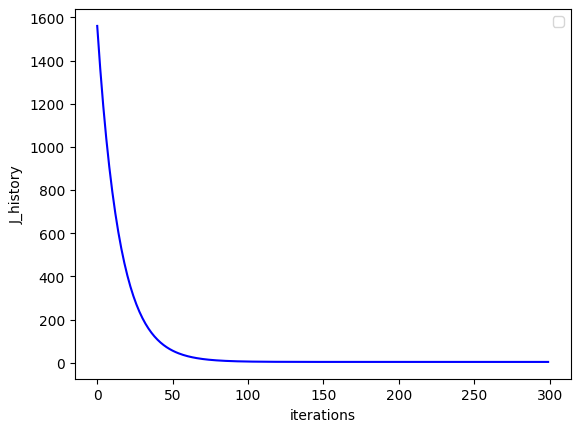

In [79]:
# plt.plot(np.arange(len(J_hist)-1000,len(J_hist)),J_hist[-1000:], color='red')
start = max(0, len(J_hist) - 1000)
plt.plot(np.arange(300), J_hist[:300], color='b')
print(J_hist[300])
plt.xlabel("iterations")
plt.ylabel("J_history")
plt.legend()
plt.show()

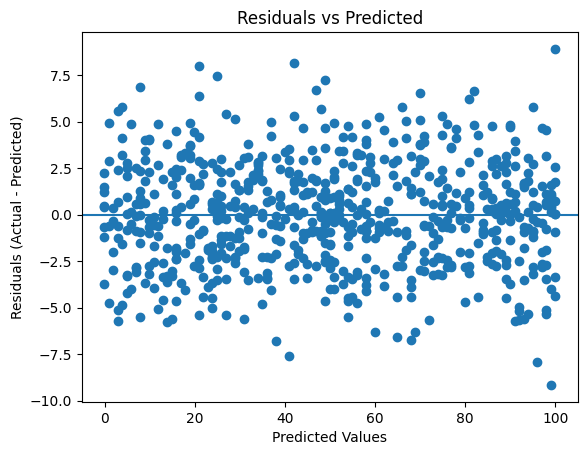

In [84]:
residuals = y_train - predictions
plt.figure()
plt.scatter(predictions, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()

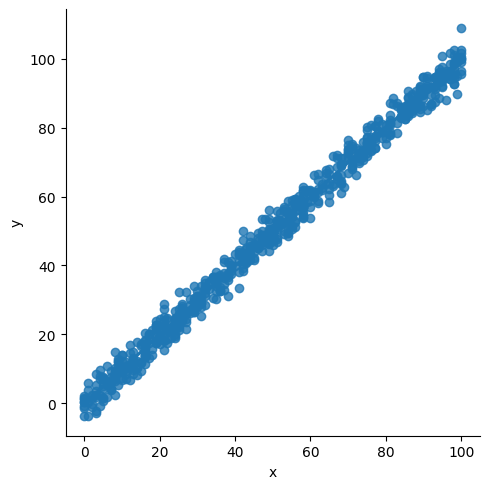

In [59]:
sns.lmplot(data= df, x="x", y = "y")

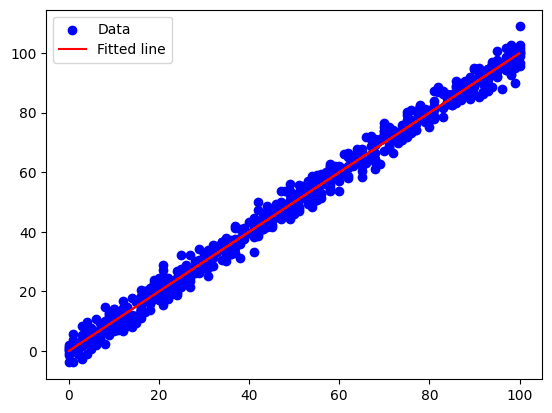

In [60]:
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.plot(X_train, predictions, color='red', label='Fitted line')
plt.legend()
plt.show()

In [61]:
lm = LinearRegression()
lm.fit(X_train.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
lm.coef_
# X_train.reshape(-1,1).shape
# lm.intercept_

array([1.00065638])

Text(0, 0.5, 'Predicted')

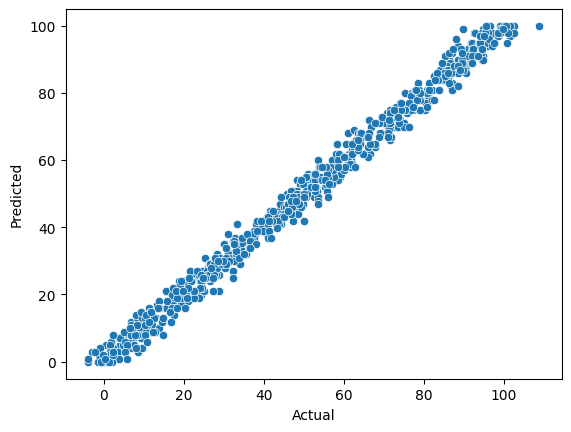

In [67]:
predictions = lm.predict(X_train.reshape(-1,1))
predictions
sns.scatterplot(x=y_train, y=predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.show()

In [64]:
sk_learn_w = lm.coef_[0]
sk_learn_b = lm.intercept_

my_w = w_fin
my_b = b_fin

sk_cost = compute_cost_one_feature_vec(X_train,y_train,sk_learn_w,sk_learn_b)
my_cost = compute_cost_one_feature_vec(X_train,y_train,my_w,my_b)

print(f"sk_cost = {sk_cost}, my_cost = {my_cost} ")
print(f" my_cost < sk_cost {my_cost < sk_cost}")


sk_cost = 3.933876366743844, my_cost = 3.935010900287882 
 my_cost < sk_cost False
